In [14]:
# Import libraries:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.animation import FuncAnimation

# Specify directory:
dir = 'Yuri%27s_files/'

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

In [4]:
# Define function to calculate emittance in one direction:
def calculate_emittance(position,momentum):
    covariance_matrix = np.cov(np.vstack((position, momentum)))
    emittance = np.sqrt(np.linalg.det(covariance_matrix))
    return emittance

In [5]:
# Values for all detectors:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []
t_vals = []; position = []
emittances_x = []; emittances_y = []
kde_vals = []
for j in range(31):

    # Load data from output txt files:
    data = np.loadtxt(dir+'out'+str(j+1)+'.txt')

    # Values for each detector:
    x = []; y = []; z = []
    px = []; py = []; pz = []
    t = []
    for i in range(data.shape[0]):
        x.append(data[i][0]/10) # mm -> cm
        y.append(data[i][1]/10)
        z.append(data[i][2]/10)
        px.append(data[i][3]) # MeV/c
        py.append(data[i][4])
        pz.append(data[i][5])
        t.append(data[i][6]) # ns
    
    # 2D Gaussian kernel density estimate:
    data = np.vstack([x,y])
    kde = gaussian_kde(data) # with positions in xy-plane
    kde_val = kde(data)
    kde_vals.append(kde_val)

    # Values for entire channel:
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)
    px_vals.append(px)
    py_vals.append(py)
    pz_vals.append(pz)
    t_vals.append(t)
    position.append(z[0]/100) # cm -> m

    # Calculate emittances:
    emittance_x = calculate_emittance(x,px)
    emittance_y = calculate_emittance(y,py)
    # print('***** Detector '+str(j+1)+' *****')
    # print("Transverse emittance (x):", emittance_x)
    # print("Transverse emittance (y):", emittance_y)

    # Emittance values along channel:
    emittances_x.append(emittance_x)
    emittances_y.append(emittance_y)

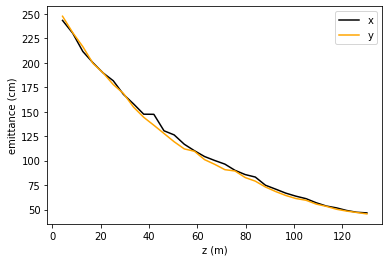

In [6]:
# Plot emittance along channel:
plt.figure(1)
plt.plot(position,emittances_x,color='black',label='x')
plt.plot(position,emittances_y,color='orange',label='y')
plt.xlabel('z (m)')
plt.ylabel('emittance (cm)')
plt.legend()

In [7]:
position

[4.2501999999999995,
 8.4502,
 12.6502,
 16.8502,
 21.0502,
 25.2502,
 29.4502,
 33.6502,
 37.850199999999994,
 42.0502,
 46.25019999999999,
 50.450199999999995,
 54.6502,
 58.850199999999994,
 63.0502,
 67.25019999999999,
 71.4502,
 75.6502,
 79.8502,
 84.0502,
 88.2502,
 92.45020000000001,
 96.6502,
 100.85,
 105.05,
 109.25,
 113.45,
 117.65,
 121.85,
 126.05,
 130.25]

In [46]:
max_kde_vals = []
for i in range(31):
    max_kde_vals.append(max(kde_vals[i]))
max_kde = max(max_kde_vals)
print(max_kde)

0.016152621970476705


In [55]:
import matplotlib.cm as cm

/home/criggall/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


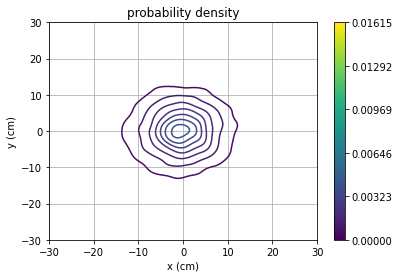

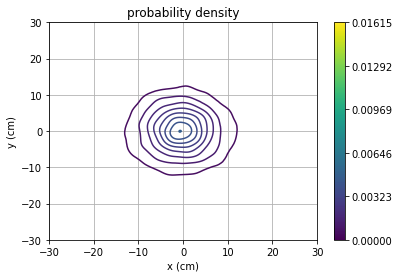

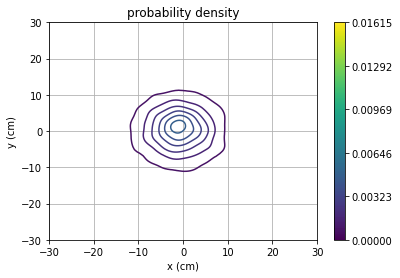

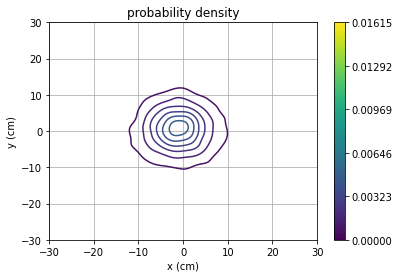

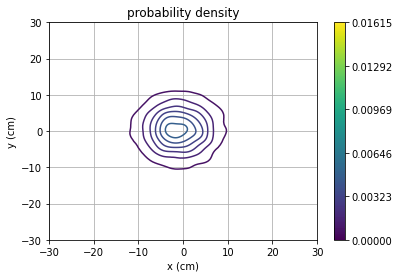

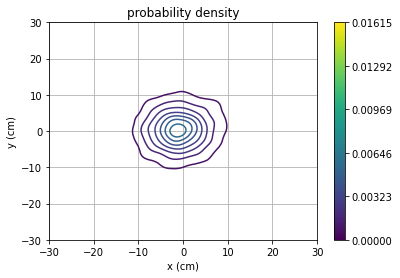

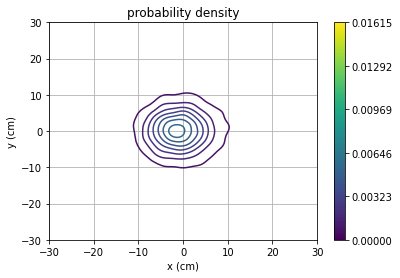

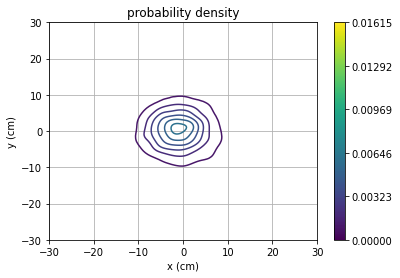

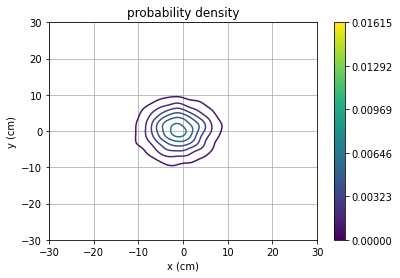

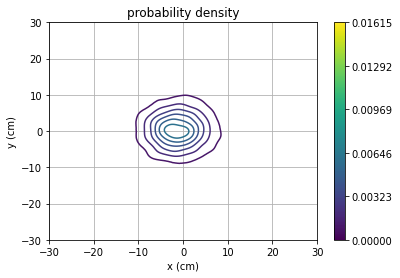

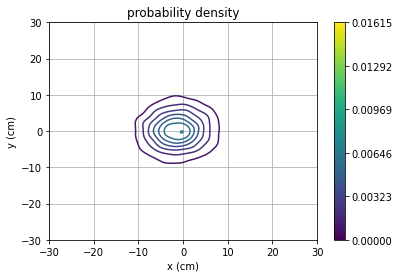

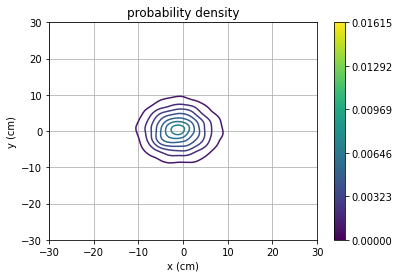

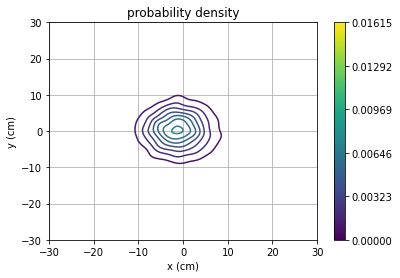

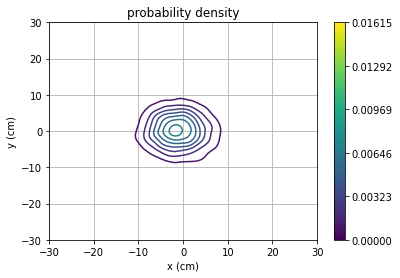

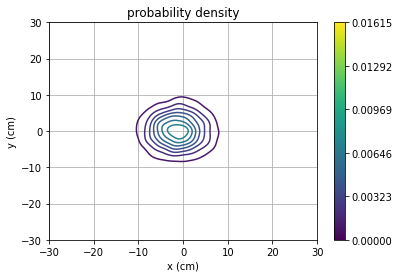

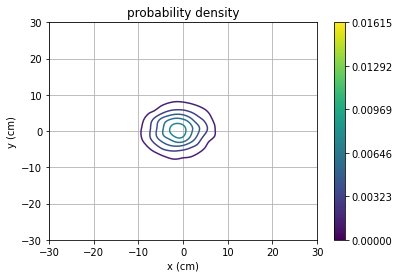

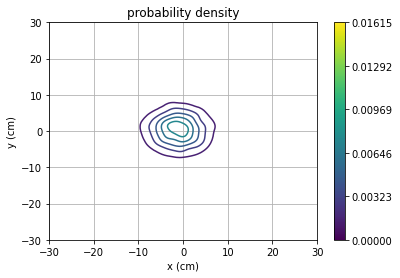

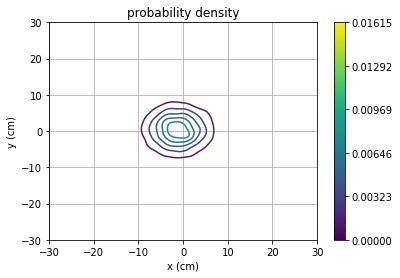

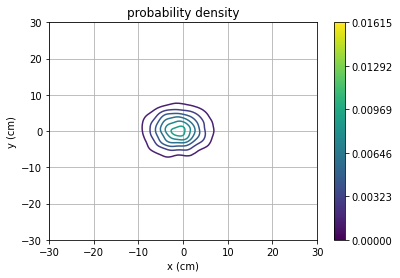

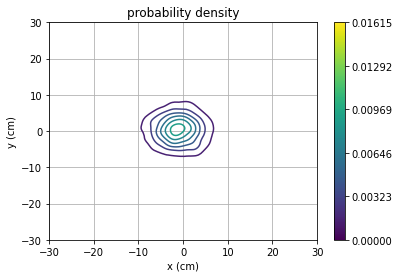

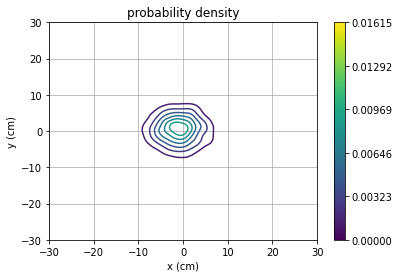

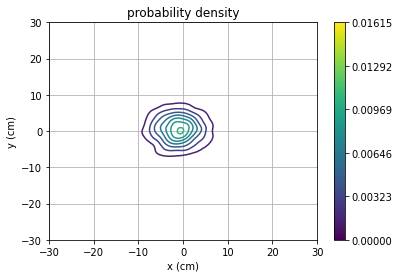

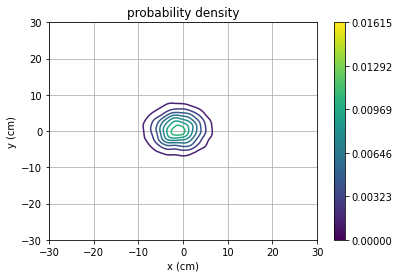

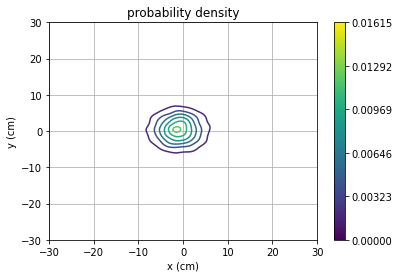

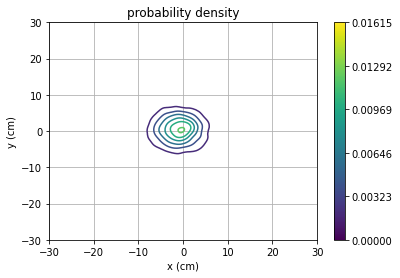

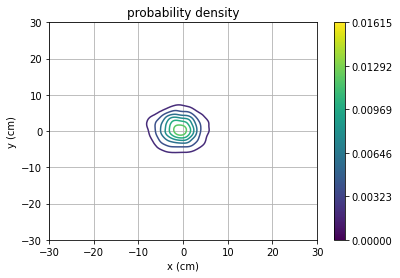

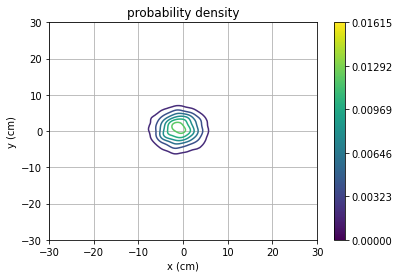

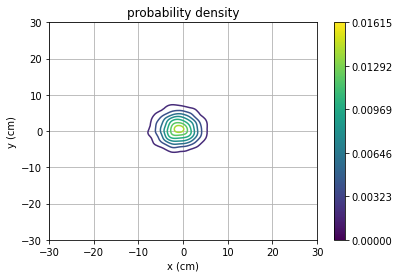

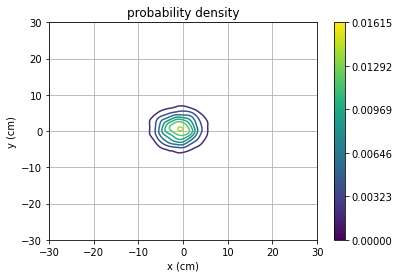

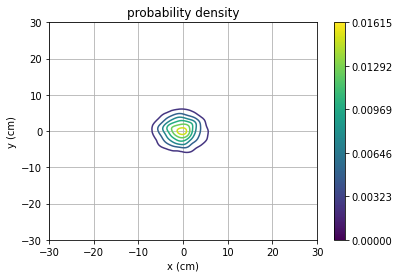

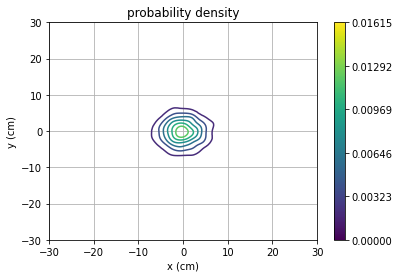

In [61]:
# Contour plots:
for i in range(31):
    plt.figure(i)
    im = plt.tricontour(x_vals[i],y_vals[i],kde_vals[i])
    mapp = cm.ScalarMappable(norm=norm, cmap='inferno')
    cbar = plt.colorbar(mapp)
    im.set_clim(0,max_kde)
    cbar.update_normal(im)
    cbar.set_ticks(np.linspace(0,max_kde,num=6))
    plt.title('probability density')
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.grid()

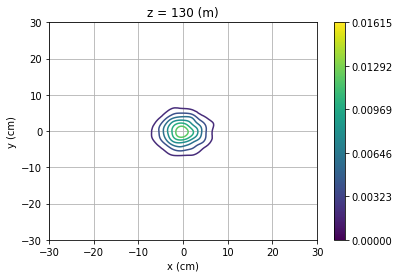

In [62]:
# Animated contour plot:
fig = plt.figure()
def animate(frame):
    plt.clf()
    im = plt.tricontour(x_vals[frame],y_vals[frame],kde_vals[frame])
    mapp = cm.ScalarMappable(norm=norm, cmap='inferno')
    cbar = plt.colorbar(mapp)
    im.set_clim(0,max_kde)
    cbar.update_normal(im)
    cbar.set_ticks(np.linspace(0,max_kde,num=6))
    plt.xlim(-30,30)
    plt.ylim(-30,30)
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
    plt.title('z = '+str(round(position[frame]))+' (m)')
    plt.grid()
animation = FuncAnimation(fig, animate, frames=31, interval=400, repeat=True)
animation.save('contour_animation.gif', writer='pillow')